# Summary
These are the input values to each neuron during an update step. Taking the sign of $h_i(t)$ gives us the next value of that neuron, $S_i(t+1) = \text{sgn}(h_i(t))$.

## Hopfield Network

#### Weight Matrix:
$$ w_{ij} = \sum_{\mu=1}^P \xi_i^\mu \xi_j^\mu $$

#### Update Rule:
\begin{align*}
    h_i(t) = \sum_{j=1}^N w_{ij}S_j(t) = \sum_{\mu=1}^P \xi_i^\mu \left( \sum_{j = 1}^N \xi_j^\mu S_j(t) \right) = \sum_{\mu=1}^P \xi_i^\mu m^\mu(t)
\end{align*} 

#### Interaction Functions:
Note, that we omit the normalization factors $\frac{1}{N}$ since we only care about sign and omit the self-coupling terms by setting $w_{ii} = \sum_{\mu=1}^P \xi_i^\mu \xi_i^\mu = 0$ .

\begin{align*}
    q^\mu(t) &= \sum_{j \neq i}^N \xi_j^\mu S_j(t)
\end{align*} 

## Polynomial Interaction Function ([Krotov, Hopfield](https://arxiv.org/pdf/1606.01164.pdf))
#### Update Rule:
\begin{align*}
    h_i(t) &= \sum_{\mu=1}^P \left[ \left( \xi_i^\mu + \sum_{j \neq i} \xi_j^\mu S_j(t) \right)^n - \left( -\xi_i^\mu + \sum_{j \neq i} \xi_j^\mu S_j(t) \right)^n \right] \\
    &= \sum_{\mu=1}^P \left[ \left( \sum_{m=0}^n {n \choose m} (\xi_i^\mu)^m (\sum_{j \neq i} \xi_j^\mu S_j(t))^{n-m} \right) - \left( \sum_{m=0}^n {n \choose m} (- \xi_i^\mu)^m (\sum_{j \neq i} \xi_j^\mu S_j(t))^{n-m} \right) \right] \\
    &= \sum_{\mu=1}^P \left[ \left( 1 - (-1)^m \right) \left( \sum_{m=0}^n {n \choose m} (\xi_i^\mu)^m (\sum_{j \neq i} \xi_j^\mu S_j(t))^{n-m} \right) \right] \\
    &= 2 \sum_{\mu=1}^P \xi_i^\mu \left[\sum_{m \ \textrm{odd}} {n \choose m} \left( \sum_{j \neq i} \xi_j^\mu S_j(t) \right)^{n-m} \right] \\
    &= 2 \sum_{\mu=1}^P \xi_i^\mu \left[\sum_{m \ \textrm{odd}} {n \choose m} \left( q^\mu(t) \right)^{n-m} \right] 
\end{align*} 

#### Examples:
\begin{align*}
    n=3 &\implies h_i(t) = 2 \sum_{\mu=1}^P \xi_i^\mu \left[3 \left( \sum_{j \neq i} \xi_j^\mu S_j(t) \right)^2 + 1 \right] \\
    n=4 &\implies h_i(t) = 2 \sum_{\mu=1}^P \xi_i^\mu \left[4 \left( \sum_{j \neq i} \xi_j^\mu S_j(t) \right)^3 + 4 \left( \sum_{j \neq i} \xi_j^\mu S_j(t) \right) \right] \\
    n=5 &\implies h_i(t) = 2 \sum_{\mu=1}^P \xi_i^\mu \left[5 \left( \sum_{j \neq i} \xi_j^\mu S_j(t) \right)^4 + 10 \left( \sum_{j \neq i} \xi_j^\mu S_j(t) \right)^2 + 1 \right] \\
    n=6 &\implies h_i(t) = 2 \sum_{\mu=1}^P \xi_i^\mu \left[6 \left( \sum_{j \neq i} \xi_j^\mu S_j(t) \right)^5 + 20 \left( \sum_{j \neq i} \xi_j^\mu S_j(t) \right)^3 + 6 \left( \sum_{j \neq i} \xi_j^\mu S_j(t) \right) \right]    
\end{align*} 

## Exponential Interaction Function ([Demircigil et al.](https://arxiv.org/pdf/1702.01929.pdf))
#### Update Rule:
\begin{align*}
    h_i(t) &= \sum_{\mu=1}^P \left[ \exp \left( \xi_i^\mu + \sum_{j \neq i} \xi_j^\mu S_j(t) \right) - \exp \left( -\xi_i^\mu + \sum_{j \neq i} \xi_j^\mu S_j(t) \right) \right]
\end{align*}


## Asymmetric Hopfield Network ([Sompolinksy, Kanter](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.57.2861))
#### Update Rule:
\begin{align*}
    h_i(t) &= \sum_{\mu=1}^P \left[\xi_i^\mu \left( \sum_{j = 1}^N \xi_j^\mu S_j(t) \right) + \lambda \xi_i^{\mu+1} \left( \sum_{j = 1}^N \xi_j^\mu \bar{S_j}(t) \right) \right] \\
    h_i(t) &= \sum_{\mu=1}^P \left[\xi_i^\mu q^\mu(t) + \lambda \xi_i^{\mu+1} \bar{q}^\mu(t) \right]
\end{align*} 

#### Discrete Convolution:
\begin{align*}
    \bar{S}_j(t) &= \sum_{k=0}^t G(t-k)S_j(k) \quad , \quad G(t) = \frac{\Theta(\tau - t)}{t}
\end{align*}

Note that G(t) sums to 1.

## Asymmetric Dense Associative Memory Network (Proposed Rules)
#### Rule 1
\begin{align*}
    h_i(t) &= \sum_{\mu=1}^P \left[ \xi_i^\mu \left(\sum_{j = 1}^N \xi_j^\mu S_j(t) \right)^{n-1} + \lambda \xi_i^{\mu+1} \left(\sum_{j = 1}^N \xi_j^\mu \bar{S_j}(t) \right)^{n-1} \right]
\end{align*} 

\begin{align*}
    n=3 &\implies h_i(t) = \sum_{\mu=1}^P \left[ \xi_i^\mu \left(\sum_{j,k} \xi_j^\mu \xi_k^\mu S_j(t) S_k(t) \right) + \lambda \xi_i^{\mu+1} \left(\sum_{j,k} \xi_j^\mu \xi_k^\mu \bar{S_j}(t) \bar{S_k}(t) \right) \right] \\
    n=4 &\implies h_i(t) = \sum_{\mu=1}^P \left[ \xi_i^\mu \left(\sum_{j,k,l} \xi_j^\mu \xi_k^\mu \xi_l^\mu S_j(t) S_k(t) S_l(t) \right) + \lambda \xi_i^{\mu+1} \left(\sum_{j,k,l} \xi_j^\mu \xi_k^\mu \xi_l^\mu \bar{S_j}(t) \bar{S_k}(t) \bar{S_l}(t) \right) \right]
\end{align*} 


#### Proposed Rule 2
This comes from adding the term to the energy function and has multiple powers for the interaction term. 
\begin{align*}
    h_i(t) &= \sum_{\mu=1}^P \left[ \left( \xi_i^\mu + q^\mu(t) \right)^n + \lambda \xi^{\mu+1}_i \left( \frac{\xi^\mu_i}{\tau} + \xi^\mu_i \bar{S}_i(t-1) + \bar{q}^\mu(t) \right)^n - \left( - \xi_i^\mu + q^\mu(t) \right)^n - \lambda \xi^{\mu+1}_i \left( -\frac{\xi^\mu_i}{\tau} + \xi^\mu_i \bar{S}_i(t-1) + \bar{q}^\mu(t) \right)^n \right] \\
    &= 2 \sum_{\mu=1}^P \xi_i^\mu \left[\sum_{m \textrm{ odd}} {n \choose m} \left[ \left( q^\mu(t) \right)^{n-m} + \left(\frac{\lambda \xi^{\mu+1}_i}{\tau^m}\right) \left( \xi^\mu_i \bar{S}_i(t-1) + \bar{q}^\mu(t) \right)^{n-m} \right] \right] 
\end{align*} 

In [6]:
# Import Packages
import numpy as np
np.random.seed(1)

from matplotlib import pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
import skimage.data
from skimage.color import rgb2gray
from skimage.filters import threshold_mean
from skimage.transform import resize

In [7]:
# Data Preprocessing
def generate_patterns(num_neuron = 16, num_pattern = 2):
    patterns = np.random.binomial(1, 0.5, (num_pattern, num_neuron))
    np.place(patterns, patterns == 0, -1)
    return patterns

def corrupt_pattern(pattern, corruption_level):
    corrupted_pattern = np.copy(pattern)
    inv = np.random.binomial(n=1, p=corruption_level, size=len(pattern))
    for i, v in enumerate(pattern):
        if inv[i]:
            corrupted_pattern[i] = -1 * v
    return corrupted_pattern

def flip_bit(pattern):
    idx = np.random.randint(0, len(pattern)) 
    flipped_pattern = np.copy(pattern)
    flipped_pattern[idx] = -pattern[idx]
    return flipped_pattern 

def plot(data, test, predicted, figsize=(8, 12)):
    fig, axarr = plt.subplots(1,3, figsize=figsize)

    axarr[0].set_title('Original vs Original')
    axarr[0].imshow(data @ data.T, cmap=cm.gray_r)    
    axarr[1].set_title("Original vs Corrupted")
    axarr[1].imshow(data @ test.T, cmap=cm.gray_r)
    axarr[2].set_title("Original vs Reconstructed")
    axarr[2].imshow(data @ predicted.T, cmap=cm.gray_r)
    plt.savefig("result.png")
    plt.show()    

In [8]:
# Standard Hopfield Network
class HopfieldNetwork(object):      
    def train_weights(self, train_data):
#         print("Start to train weights...")
        num_pattern =  train_data.shape[0]
        self.num_neuron = train_data.shape[1]
        
        # initialize weights
        W = np.zeros((self.num_neuron, self.num_neuron))
        
        # Hebb rule
        for i in tqdm(range(num_pattern)):
            t = train_data[i]
            W += np.outer(t, t)
        
        # Make diagonal element of W into 0
        diagW = np.diag(np.diag(W))
        W = W - diagW
        W /= num_pattern
        
        self.W = W 
    
    def predict(self, data, num_iter=1):
#         print("Start to predict...")
        self.num_iter = num_iter
        
        # Copy to avoid call by reference 
        copied_data = np.copy(data)
        
        # Define predict list
        predicted = []
        for i in tqdm(range(len(data))):
            predicted.append(self._run(copied_data[i]))
        return np.array(predicted)
    
    def _run(self, init_s):
        """
        Asynchronous update
        """
        # Compute initial state energy
        s = init_s
        e = self.energy(s)

        # Iteration
        for i in range(self.num_iter):
            for j in range(100):
                # Select random neuron
                idx = np.random.randint(0, self.num_neuron) 
                # Update s
                s[idx] = np.sign(self.W[idx].T @ s)

            # Compute new state energy
            e_new = self.energy(s)

            # s is converged
            if e == e_new:
                return s
            # Update energy
            e = e_new
        return s
    
    
    def energy(self, s):
        return -0.5 * s @ self.W @ s

    def plot_weights(self):
        plt.figure(figsize=(6, 5))
        w_mat = plt.imshow(self.W, cmap=cm.gray_r)
        plt.colorbar(w_mat)
        plt.title("Network Weights")
        plt.tight_layout()
        plt.savefig("weights.png")
        plt.show()

In [9]:
# Modified Hopfield Memory Network
class ModifiedHopfieldNetwork(object):      
    def train_weights(self, patterns, n = 3):
#         print("Start to train weights...")
        self.patterns = patterns
        self.n = n
        self.num_pattern =  patterns.shape[0]
        self.num_neuron = patterns.shape[1]
            
    def predict(self, data, num_iter=1):
        self.num_iter = num_iter
        
        # Copy to avoid call by reference 
        copied_data = np.copy(data)
        
        # Define predict list
        predicted = []
        for i in tqdm(range(len(data))):
            predicted.append(self._run(copied_data[i]))
        return np.array(predicted)
    
    def _run(self, init_s):
        """
        Asynchronous update
        """
        # Compute initial state energy
        s = init_s
        e = self.energy(s)

        # Iteration
        for idx in range(self.num_iter):
            for i in range(self.num_neuron):
                h_i = 0
                for p in range(self.num_pattern):
                    # Calculate input for for each pattern and sum over each.
                    h_i += self.patterns[p,i] * (np.dot(self.patterns[p],s) - self.patterns[p,i]*s[i])**(self.n-1)
                s[i] = np.sign(h_i)

            # Compute new state energy
            e_new = self.energy(s)

            # s is converged
            if e == e_new:
                return s
            # Update energy
            e = e_new
        return s
    
    def energy(self, s):
        e = 0 
        for p in range(self.num_pattern):
            for i in range(self.num_neuron):
                alignment = - self.patterns[p,i] * s[i]
            e += alignment**self.n
        return e

In [10]:
# Dense Associative Memory Network
class Dense_Network(object):      
    def train_weights(self, patterns, n = 3):
        print("Start to train weights...")
        self.patterns = patterns
        self.n = n
        self.num_pattern =  patterns.shape[0]
        self.num_neuron = patterns.shape[1]
        
#         # initialize weights
#         W = np.zeros((self.num_neuron, self.num_neuron, self.num_neuron))

#         # Hebb rule
#         W = np.einsum(patterns, [0,1], patterns, [0,2], patterns, [0,3], [1,2,3])
            
#         # Make diagonal element of W into 0
#         diagW = np.einsum(W, [0,0,1], [0,1])
#         W = W - diagW
        
#         self.W = W 
    
    def predict(self, data, num_iter=10):
        self.num_iter = num_iter
        
        # Copy to avoid call by reference 
        copied_data = np.copy(data)
        
        # Define predict list
        predicted = []
        for i in tqdm(range(len(data))):
            predicted.append(self._run(copied_data[i]))
        return np.array(predicted)
    
    def _run(self, init_s):
        """
        Asynchronous update
        """
        # Compute initial state energy
        s = init_s
        e = self.energy(s)

        # Iteration
        for idx in range(self.num_iter):
            for i in range(self.num_neuron):
                h_i = 0
                for p in range(self.num_pattern):
                    # Update s
                    h_on = (self.patterns[p,i] + (np.dot(self.patterns[p],s) - self.patterns[p,i]*s[i]))**self.n
                    h_off = (-self.patterns[p,i] + (np.dot(self.patterns[p],s) - self.patterns[p,i]*s[i]))**self.n
                    h_i += (h_on - h_off)
                s[i] = np.sign(h_i)

            # Compute new state energy
            e_new = self.energy(s)

            # s is converged
            if e == e_new:
                return s
            # Update energy
            e = e_new
        return s
    
    def energy(self, s):
        e = 0 
        for p in range(self.num_pattern):
            for i in range(self.num_neuron):
                alignment = self.patterns[p,i] * s[i]
            e -= alignment**self.n
        return e
            
    def plot_weights(self):
        plt.figure(figsize=(6, 5))
        w_mat = plt.imshow(self.W, cmap=cm.gray_r)
        plt.colorbar(w_mat)
        plt.title("Network Weights")
        plt.tight_layout()
        plt.savefig("weights.png")
        plt.show()

  0%|          | 0/20 [00:00<?, ?it/s]<ipython-input-9-cdbb0f51e148>:36: RuntimeWarning: overflow encountered in long_scalars
  h_i += self.patterns[p,i] * (np.dot(self.patterns[p],s) - self.patterns[p,i]*s[i])**(self.n-1)


Start to train weights...


  0%|          | 0/20 [00:00<?, ?it/s]<ipython-input-10-3c50deb39e3f>:50: RuntimeWarning: overflow encountered in long_scalars
  h_i += (h_on - h_off)
100%|██████████| 20/20 [00:02<00:00,  8.43it/s]


Hopfield


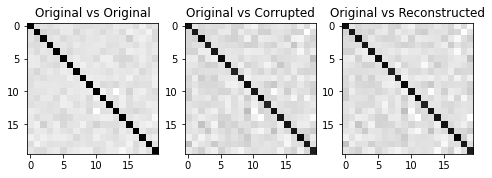

Modified Hopfield, d = 12


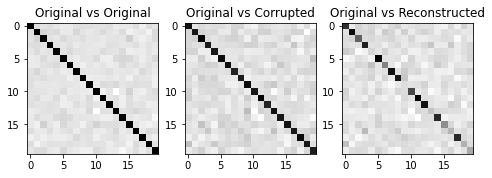

Dense Associative Memory Network, d = 12


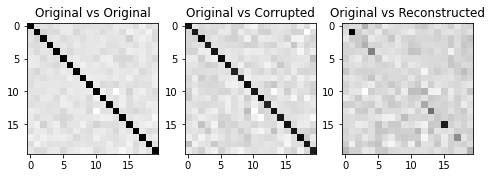

In [11]:
# Generate Patterns
patterns = generate_patterns(num_neuron = 1000, num_pattern = 20)
degree = 12

# Generate Corrupted Patterns
flipped_patterns = np.array([flip_bit(p) for p in patterns])
corrupted_patterns = np.array([corrupt_pattern(p, 0.2) for p in patterns])

# Create Hopfield Network Model
hopfield_model = HopfieldNetwork()
hopfield_model.train_weights(patterns)
modified_hopfield_model = ModifiedHopfieldNetwork()
modified_hopfield_model.train_weights(patterns, n=degree)
damn_model = Dense_Network()
damn_model.train_weights(patterns, n=degree)

# Try to Reconstruct Original Patterns
h_reconstructed_patterns = np.array(hopfield_model.predict(corrupted_patterns))
mh_reconstructed_patterns = np.array(modified_hopfield_model.predict(corrupted_patterns))
damn_reconstructed_patterns = np.array(damn_model.predict(corrupted_patterns))

# Plot Values
print("Hopfield")
plot(patterns, corrupted_patterns, h_reconstructed_patterns)
print(f"Modified Hopfield, d = {degree}")
plot(patterns, corrupted_patterns, mh_reconstructed_patterns)
print(f"Dense Associative Memory Network, d = {degree}")
plot(patterns, corrupted_patterns, damn_reconstructed_patterns)

  6%|▌         | 3/50 [00:00<00:02, 21.16it/s]

d = 2.0
Start to train weights...


  6%|▌         | 3/50 [00:00<00:01, 29.42it/s]

d = 3.0
Start to train weights...


  6%|▌         | 3/50 [00:00<00:01, 26.30it/s]

d = 4.0
Start to train weights...


  4%|▍         | 2/50 [00:00<00:02, 17.60it/s]

d = 5.0
Start to train weights...


  6%|▌         | 3/50 [00:00<00:01, 29.86it/s]

d = 6.0
Start to train weights...


  6%|▌         | 3/50 [00:00<00:01, 24.33it/s]

d = 7.0
Start to train weights...


  6%|▌         | 3/50 [00:00<00:01, 26.88it/s]

d = 8.0
Start to train weights...


  6%|▌         | 3/50 [00:00<00:02, 19.81it/s]

d = 9.0
Start to train weights...


  6%|▌         | 3/50 [00:00<00:01, 27.28it/s]

d = 10.0
Start to train weights...


  6%|▌         | 3/50 [00:00<00:01, 26.96it/s]

d = 11.0
Start to train weights...


  6%|▌         | 3/50 [00:00<00:01, 25.82it/s]

d = 12.0
Start to train weights...


100%|██████████| 50/50 [00:02<00:00, 21.33it/s]


Text(0.5, 1.0, 'Corrupted Pattern Recovery, N = 100, P = 50')

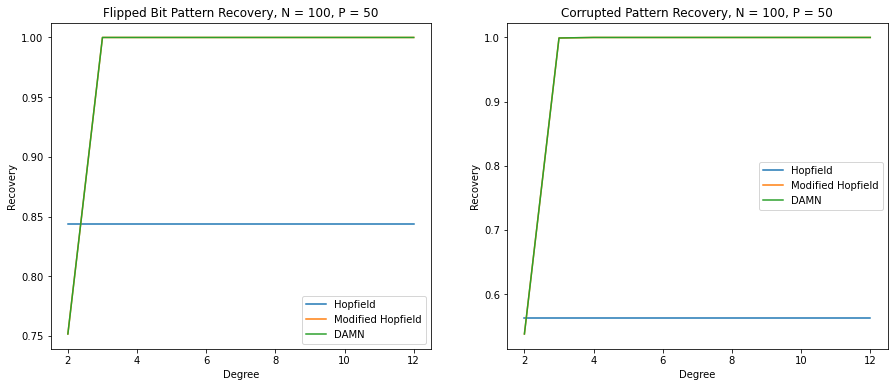

In [12]:
# Generate Patterns
num_neuron = 100
num_pattern = 50
degrees = np.linspace(2,12, 11)
patterns = generate_patterns(num_neuron, num_pattern)

h_reconstruction1 = np.zeros(len(degrees))
h_reconstruction2 = np.zeros(len(degrees))
mh_reconstruction1 = np.zeros(len(degrees))
mh_reconstruction2 = np.zeros(len(degrees))
damn_reconstruction1 = np.zeros(len(degrees))
damn_reconstruction2 = np.zeros(len(degrees))

# Generate Corrupted Patterns
flipped_patterns = np.array([flip_bit(p) for p in patterns])
corrupted_patterns = np.array([corrupt_pattern(p, 0.2) for p in patterns])

# Create Hopfield Network Model
hopfield_model = HopfieldNetwork()
hopfield_model.train_weights(patterns)
h_reconstructed_patterns1 = np.array(hopfield_model.predict(flipped_patterns))
h_reconstructed_patterns2 = np.array(hopfield_model.predict(corrupted_patterns))

for degree_idx, degree in enumerate(degrees):
    print(f'd = {degree}')
    # Create Degree Dependent Hopfield Networks
    modified_hopfield_model = ModifiedHopfieldNetwork()
    modified_hopfield_model.train_weights(patterns, n=degree)
    damn_model = Dense_Network()
    damn_model.train_weights(patterns, n=degree)

    # Try to Reconstruct Original Patterns
    mh_reconstructed_patterns1 = np.array(modified_hopfield_model.predict(flipped_patterns))
    mh_reconstructed_patterns2 = np.array(modified_hopfield_model.predict(corrupted_patterns))
    damn_reconstructed_patterns1 = np.array(damn_model.predict(flipped_patterns))
    damn_reconstructed_patterns2 = np.array(damn_model.predict(corrupted_patterns))

    h_reconstruction1[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], h_reconstructed_patterns1[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
    h_reconstruction2[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], h_reconstructed_patterns2[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
    mh_reconstruction1[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], mh_reconstructed_patterns1[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
    mh_reconstruction2[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], mh_reconstructed_patterns2[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
    damn_reconstruction1[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], damn_reconstructed_patterns1[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
    damn_reconstruction2[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], damn_reconstructed_patterns2[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern    
    
fig, axarr = plt.subplots(1,2, figsize=(15,6))

axarr[0].plot(degrees, h_reconstruction1, label = 'Hopfield')
axarr[0].plot(degrees, mh_reconstruction1, label = 'Modified Hopfield')
axarr[0].plot(degrees, damn_reconstruction1, label = 'DAMN')
axarr[0].set_xlabel('Degree')
axarr[0].set_ylabel('Recovery')
axarr[0].legend()
axarr[0].set_title(f'Flipped Bit Pattern Recovery, N = {num_neuron}, P = {num_pattern}')

axarr[1].plot(degrees, h_reconstruction2, label = 'Hopfield')
axarr[1].plot(degrees, mh_reconstruction2, label = 'Modified Hopfield')
axarr[1].plot(degrees, damn_reconstruction2, label = 'DAMN')
axarr[1].set_xlabel('Degree')
axarr[1].set_ylabel('Recovery')
axarr[1].legend()
axarr[1].set_title(f'Corrupted Pattern Recovery, N = {num_neuron}, P = {num_pattern}')

In [ ]:
# Generate Patterns
num_neuron = 100
num_pattern = 20
degrees = np.linspace(2,102, 5)
patterns = generate_patterns(num_neuron, num_pattern)

h_reconstruction1 = np.zeros(len(degrees))
h_reconstruction2 = np.zeros(len(degrees))
mh_reconstruction1 = np.zeros(len(degrees))
mh_reconstruction2 = np.zeros(len(degrees))
damn_reconstruction1 = np.zeros(len(degrees))
damn_reconstruction2 = np.zeros(len(degrees))

# Generate Corrupted Patterns
flipped_patternsText = np.array([flip_bit(p) for p in patterns])
corrupted_patterns = np.array([corrupt_pattern(p, 0.2) for p in patterns])

# Create Hopfield Network Model
hopfield_model = HopfieldNetwork()
hopfield_model.train_weights(patterns)
h_reconstructed_patterns1 = np.array(hopfield_model.predict(flipped_patterns))
h_reconstructed_patterns2 = np.array(hopfield_model.predict(corrupted_patterns))

for degree_idx, degree in enumerate(degrees):
    print(f'd = {degree}')
    # Create Degree Dependent Hopfield Networks
    modified_hopfield_model = ModifiedHopfieldNetwork()
    modified_hopfield_model.train_weights(patterns, n=degree)
    damn_model = Dense_Network()
    damn_model.train_weights(patterns, n=degree)

    # Try to Reconstruct Original Patterns
    mh_reconstructed_patterns1 = np.array(modified_hopfield_model.predict(flipped_patterns))
    mh_reconstructed_patterns2 = np.array(modified_hopfield_model.predict(corrupted_patterns))
    damn_reconstructed_patterns1 = np.array(damn_model.predict(flipped_patterns))
    damn_reconstructed_patterns2 = np.array(damn_model.predict(corrupted_patterns))

    h_reconstruction1[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], h_reconstructed_patterns1[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
    h_reconstruction2[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], h_reconstructed_patterns2[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
    mh_reconstruction1[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], mh_reconstructed_patterns1[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
    mh_reconstruction2[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], mh_reconstructed_patterns2[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
    damn_reconstruction1[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], damn_reconstructed_patterns1[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
    damn_reconstruction2[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], damn_reconstructed_patterns2[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern    
    
fig, axarr = plt.subplots(1,2, figsize=(15,6))

axarr[0].plot(degrees, h_reconstruction1, label = 'Hopfield')
axarr[0].plot(degrees, mh_reconstruction1, label = 'Modified Hopfield')
axarr[0].plot(degrees, damn_reconstruction1, label = 'DAMN')
axarr[0].set_xlabel('Degree')
axarr[0].set_ylabel('Recovery')
axarr[0].legend()
axarr[0].set_title(f'Flipped Bit Pattern Recovery, N = {num_neuron}, P = {num_pattern}')

axarr[1].plot(degrees, h_reconstruction2, label = 'Hopfield')
axarr[1].plot(degrees, mh_reconstruction2, label = 'Modified Hopfield')
axarr[1].plot(degrees, damn_reconstruction2, label = 'DAMN')
axarr[1].set_xlabel('Degree')
axarr[1].set_ylabel('Recovery')
axarr[1].legend()
axarr[1].set_title(f'Corrupted Pattern Recovery, N = {num_neuron}, P = {num_pattern}')

  8%|▊         | 4/50 [00:00<00:01, 30.92it/s]

N = 2.0
Start to train weights...


  6%|▌         | 3/50 [00:00<00:01, 27.18it/s]

N = 27.0
Start to train weights...


 12%|█▏        | 6/50 [00:00<00:01, 28.13it/s]

N = 52.0
Start to train weights...


  6%|▌         | 3/50 [00:00<00:01, 29.03it/s]

N = 77.0
Start to train weights...


  6%|▌         | 3/50 [00:00<00:01, 25.71it/s]

N = 102.0
Start to train weights...


100%|██████████| 50/50 [00:02<00:00, 19.50it/s]


Text(0.5, 1.0, 'Corrupted Pattern Recovery, N = 100, P = 50')

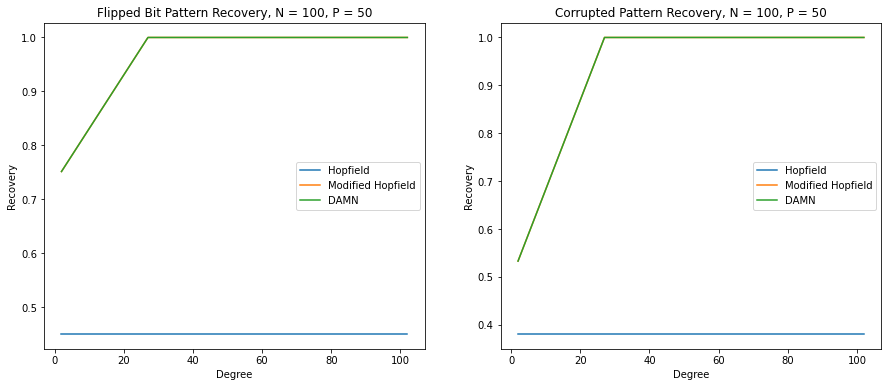

In [67]:
# Generate Patterns
num_neuron = 100
num_pattern = 50
degrees = np.linspace(2,102, 5)
patterns = generate_patterns(num_neuron, num_pattern)

h_reconstruction1 = np.zeros(len(degrees))
h_reconstruction2 = np.zeros(len(degrees))
mh_reconstruction1 = np.zeros(len(degrees))
mh_reconstruction2 = np.zeros(len(degrees))
damn_reconstruction1 = np.zeros(len(degrees))
damn_reconstruction2 = np.zeros(len(degrees))

# Generate Corrupted Patterns
flipped_patterns = np.array([flip_bit(p) for p in patterns])
corrupted_patterns = np.array([corrupt_pattern(p, 0.2) for p in patterns])

# Create Hopfield Network Model
hopfield_model = HopfieldNetwork()
hopfield_model.train_weights(patterns)
h_reconstructed_patterns1 = np.array(hopfield_model.predict(flipped_patterns))
h_reconstructed_patterns2 = np.array(hopfield_model.predict(corrupted_patterns))

for degree_idx, degree in enumerate(degrees):
    print(f'N = {degree}')
    # Create Degree Dependent Hopfield Networks
    modified_hopfield_model = ModifiedHopfieldNetwork()
    modified_hopfield_model.train_weights(patterns, n=degree)
    damn_model = Dense_Network()
    damn_model.train_weights(patterns, n=degree)

    # Try to Reconstruct Original Patterns
    mh_reconstructed_patterns1 = np.array(modified_hopfield_model.predict(flipped_patterns))
    mh_reconstructed_patterns2 = np.array(modified_hopfield_model.predict(corrupted_patterns))
    damn_reconstructed_patterns1 = np.array(damn_model.predict(flipped_patterns))
    damn_reconstructed_patterns2 = np.array(damn_model.predict(corrupted_patterns))

    h_reconstruction1[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], h_reconstructed_patterns1[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
    h_reconstruction2[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], h_reconstructed_patterns2[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
    mh_reconstruction1[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], mh_reconstructed_patterns1[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
    mh_reconstruction2[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], mh_reconstructed_patterns2[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
    damn_reconstruction1[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], damn_reconstructed_patterns1[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
    damn_reconstruction2[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], damn_reconstructed_patterns2[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern    
    
fig, axarr = plt.subplots(1,2, figsize=(15,6))

axarr[0].plot(degrees, h_reconstruction1, label = 'Hopfield')
axarr[0].plot(degrees, mh_reconstruction1, label = 'Modified Hopfield')
axarr[0].plot(degrees, damn_reconstruction1, label = 'DAMN')
axarr[0].set_xlabel('Degree')
axarr[0].set_ylabel('Recovery')
axarr[0].legend()
axarr[0].set_title(f'Flipped Bit Pattern Recovery, N = {num_neuron}, P = {num_pattern}')

axarr[1].plot(degrees, h_reconstruction2, label = 'Hopfield')
axarr[1].plot(degrees, mh_reconstruction2, label = 'Modified Hopfield')
axarr[1].plot(degrees, damn_reconstruction2, label = 'DAMN')
axarr[1].set_xlabel('Degree')
axarr[1].set_ylabel('Recovery')
axarr[1].legend()
axarr[1].set_title(f'Corrupted Pattern Recovery, N = {num_neuron}, P = {num_pattern}')

  2%|▏         | 2/100 [00:00<00:07, 13.96it/s]

N = 2.0
Start to train weights...


  2%|▏         | 2/100 [00:00<00:06, 15.23it/s]

N = 27.0
Start to train weights...


  2%|▏         | 2/100 [00:00<00:09, 10.79it/s]

N = 52.0
Start to train weights...


  2%|▏         | 2/100 [00:00<00:07, 12.78it/s]

N = 77.0
Start to train weights...


  2%|▏         | 2/100 [00:00<00:07, 13.84it/s]

N = 102.0
Start to train weights...


100%|██████████| 100/100 [00:09<00:00, 10.23it/s]


Text(0.5, 1.0, 'Corrupted Pattern Recovery, N = 100, P = 100')

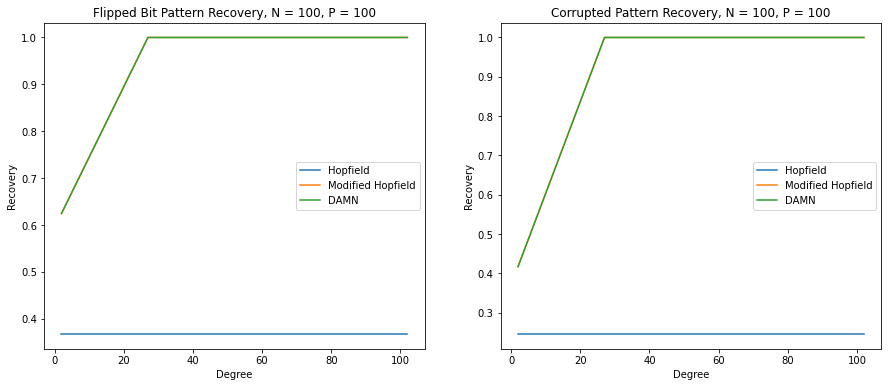

In [68]:
# Generate Patterns
num_neuron = 100
num_pattern = 100
degrees = np.linspace(2,102, 5)
patterns = generate_patterns(num_neuron, num_pattern)

h_reconstruction1 = np.zeros(len(degrees))
h_reconstruction2 = np.zeros(len(degrees))
mh_reconstruction1 = np.zeros(len(degrees))
mh_reconstruction2 = np.zeros(len(degrees))
damn_reconstruction1 = np.zeros(len(degrees))
damn_reconstruction2 = np.zeros(len(degrees))

# Generate Corrupted Patterns
flipped_patterns = np.array([flip_bit(p) for p in patterns])
corrupted_patterns = np.array([corrupt_pattern(p, 0.2) for p in patterns])

# Create Hopfield Network Model
hopfield_model = HopfieldNetwork()
hopfield_model.train_weights(patterns)
h_reconstructed_patterns1 = np.array(hopfield_model.predict(flipped_patterns))
h_reconstructed_patterns2 = np.array(hopfield_model.predict(corrupted_patterns))

for degree_idx, degree in enumerate(degrees):
    print(f'N = {degree}')
    # Create Degree Dependent Hopfield Networks
    modified_hopfield_model = ModifiedHopfieldNetwork()
    modified_hopfield_model.train_weights(patterns, n=degree)
    damn_model = Dense_Network()
    damn_model.train_weights(patterns, n=degree)

    # Try to Reconstruct Original Patterns
    mh_reconstructed_patterns1 = np.array(modified_hopfield_model.predict(flipped_patterns))
    mh_reconstructed_patterns2 = np.array(modified_hopfield_model.predict(corrupted_patterns))
    damn_reconstructed_patterns1 = np.array(damn_model.predict(flipped_patterns))
    damn_reconstructed_patterns2 = np.array(damn_model.predict(corrupted_patterns))

    h_reconstruction1[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], h_reconstructed_patterns1[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
    h_reconstruction2[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], h_reconstructed_patterns2[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
    mh_reconstruction1[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], mh_reconstructed_patterns1[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
    mh_reconstruction2[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], mh_reconstructed_patterns2[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
    damn_reconstruction1[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], damn_reconstructed_patterns1[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
    damn_reconstruction2[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], damn_reconstructed_patterns2[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern    
    
fig, axarr = plt.subplots(1,2, figsize=(15,6))

axarr[0].plot(degrees, h_reconstruction1, label = 'Hopfield')
axarr[0].plot(degrees, mh_reconstruction1, label = 'Modified Hopfield')
axarr[0].plot(degrees, damn_reconstruction1, label = 'DAMN')
axarr[0].set_xlabel('Degree')
axarr[0].set_ylabel('Recovery')
axarr[0].legend()
axarr[0].set_title(f'Flipped Bit Pattern Recovery, N = {num_neuron}, P = {num_pattern}')

axarr[1].plot(degrees, h_reconstruction2, label = 'Hopfield')
axarr[1].plot(degrees, mh_reconstruction2, label = 'Modified Hopfield')
axarr[1].plot(degrees, damn_reconstruction2, label = 'DAMN')
axarr[1].set_xlabel('Degree')
axarr[1].set_ylabel('Recovery')
axarr[1].legend()
axarr[1].set_title(f'Corrupted Pattern Recovery, N = {num_neuron}, P = {num_pattern}')

  5%|▌         | 1/20 [00:00<00:02,  6.65it/s]

N = 2.0
Start to train weights...


  5%|▌         | 1/20 [00:00<00:02,  6.97it/s]

N = 12.0
Start to train weights...


  5%|▌         | 1/20 [00:00<00:03,  5.70it/s]

N = 22.0
Start to train weights...


  5%|▌         | 1/20 [00:00<00:02,  6.94it/s]

N = 32.0
Start to train weights...


  5%|▌         | 1/20 [00:00<00:02,  6.81it/s]

N = 42.0
Start to train weights...


  5%|▌         | 1/20 [00:00<00:02,  6.95it/s]

N = 52.0
Start to train weights...


  5%|▌         | 1/20 [00:00<00:02,  6.58it/s]

N = 62.0
Start to train weights...


  5%|▌         | 1/20 [00:00<00:02,  6.71it/s]

N = 72.0
Start to train weights...


  5%|▌         | 1/20 [00:00<00:03,  5.91it/s]

N = 82.0
Start to train weights...


  5%|▌         | 1/20 [00:00<00:02,  6.79it/s]

N = 92.0
Start to train weights...


  5%|▌         | 1/20 [00:00<00:03,  6.09it/s]

N = 102.0
Start to train weights...


100%|██████████| 20/20 [00:04<00:00,  4.60it/s]


Text(0.5, 1.0, 'Corrupted Pattern Recovery, N = 1000, P = 20')

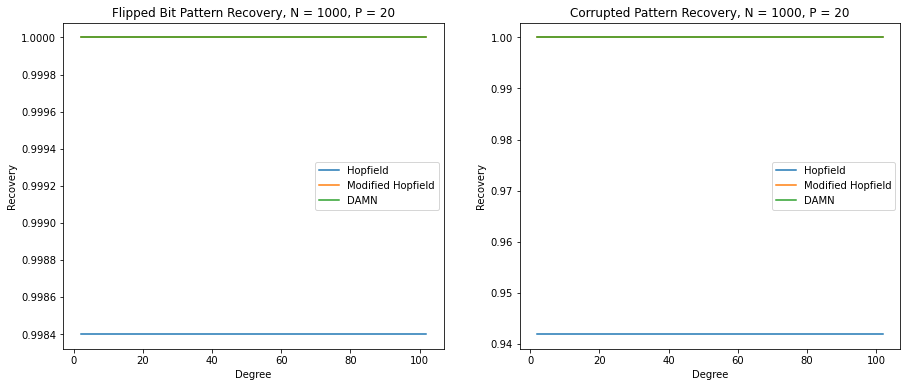

In [82]:
# Generate Patterns
num_neuron = 1000
num_pattern = 20
degrees = np.linspace(2,102, 11)
patterns = generate_patterns(num_neuron, num_pattern)

h_reconstruction1 = np.zeros(len(degrees))
h_reconstruction2 = np.zeros(len(degrees))
mh_reconstruction1 = np.zeros(len(degrees))
mh_reconstruction2 = np.zeros(len(degrees))
damn_reconstruction1 = np.zeros(len(degrees))
damn_reconstruction2 = np.zeros(len(degrees))

# Generate Corrupted Patterns
flipped_patterns = np.array([flip_bit(p) for p in patterns])
corrupted_patterns = np.array([corrupt_pattern(p, 0.2) for p in patterns])

# Create Hopfield Network Model
hopfield_model = HopfieldNetwork()
hopfield_model.train_weights(patterns)
h_reconstructed_patterns1 = np.array(hopfield_model.predict(flipped_patterns))
h_reconstructed_patterns2 = np.array(hopfield_model.predict(corrupted_patterns))

for degree_idx, degree in enumerate(degrees):
    print(f'N = {degree}')
    # Create Degree Dependent Hopfield Networks
    modified_hopfield_model = ModifiedHopfieldNetwork()
    modified_hopfield_model.train_weights(patterns, n=degree)
    damn_model = Dense_Network()
    damn_model.train_weights(patterns, n=degree)

    # Try to Reconstruct Original Patterns
    mh_reconstructed_patterns1 = np.array(modified_hopfield_model.predict(flipped_patterns))
    mh_reconstructed_patterns2 = np.array(modified_hopfield_model.predict(corrupted_patterns))
    damn_reconstructed_patterns1 = np.array(damn_model.predict(flipped_patterns))
    damn_reconstructed_patterns2 = np.array(damn_model.predict(corrupted_patterns))

    h_reconstruction1[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], h_reconstructed_patterns1[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
    h_reconstruction2[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], h_reconstructed_patterns2[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
    mh_reconstruction1[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], mh_reconstructed_patterns1[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
    mh_reconstruction2[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], mh_reconstructed_patterns2[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
    damn_reconstruction1[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], damn_reconstructed_patterns1[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
    damn_reconstruction2[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], damn_reconstructed_patterns2[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern    
    
fig, axarr = plt.subplots(1,2, figsize=(15,6))

axarr[0].plot(degrees, h_reconstruction1, label = 'Hopfield')
axarr[0].plot(degrees, mh_reconstruction1, label = 'Modified Hopfield')
axarr[0].plot(degrees, damn_reconstruction1, label = 'DAMN')
axarr[0].set_xlabel('Degree')
axarr[0].set_ylabel('Recovery')
axarr[0].legend()
axarr[0].set_title(f'Flipped Bit Pattern Recovery, N = {num_neuron}, P = {num_pattern}')

axarr[1].plot(degrees, h_reconstruction2, label = 'Hopfield')
axarr[1].plot(degrees, mh_reconstruction2, label = 'Modified Hopfield')
axarr[1].plot(degrees, damn_reconstruction2, label = 'DAMN')
axarr[1].set_xlabel('Degree')
axarr[1].set_ylabel('Recovery')
axarr[1].legend()
axarr[1].set_title(f'Corrupted Pattern Recovery, N = {num_neuron}, P = {num_pattern}')

Text(0.5, 1.0, 'Corrupted Pattern Recovery, N = 1000, P = 20')

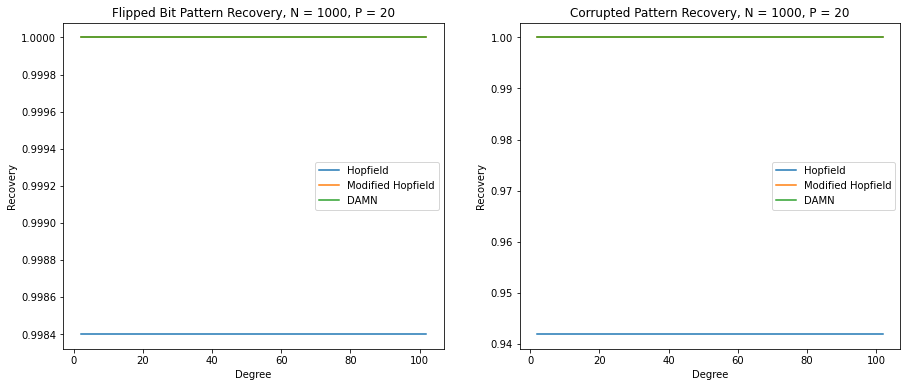

In [83]:
fig, axarr = plt.subplots(1,2, figsize=(15,6))

axarr[0].plot(degrees, h_reconstruction1, label = 'Hopfield')
axarr[0].plot(degrees, mh_reconstruction1, label = 'Modified Hopfield')
axarr[0].plot(degrees, damn_reconstruction1, label = 'DAMN')
axarr[0].set_xlabel('Degree')
axarr[0].set_ylabel('Recovery')
axarr[0].legend()
axarr[0].set_title(f'Flipped Bit Pattern Recovery, N = {num_neuron}, P = {num_pattern}')

axarr[1].plot(degrees, h_reconstruction2, label = 'Hopfield')
axarr[1].plot(degrees, mh_reconstruction2, label = 'Modified Hopfield')
axarr[1].plot(degrees, damn_reconstruction2, label = 'DAMN')
axarr[1].set_xlabel('Degree')
axarr[1].set_ylabel('Recovery')
axarr[1].legend()
axarr[1].set_title(f'Corrupted Pattern Recovery, N = {num_neuron}, P = {num_pattern}')